# Hoja de Trabajo \# 3


---


por Josué Obregón <br>
DS6011 - Feature Engineering <br>
UVG Masters - Escuela de Negocios<br>


## Objetivos

El objetivo de esta hoja de trabajo  es presentar al estudiante diferentes técnicas de transformación de variables numéricas. Éstas técnicas incluyen Feature Scaling, Feature Transformation y Feature Discretization.

También se busca que el estudiante practique la utilización de éstas técnicas con las librerías disponibles en el lenguaje Python.

## Importación de librerías y carga de los datos a varios pandas [DataFrames](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


Las librerías que importaremos para empezar son pandas y numpy para el manejo de los datos, y matplotlib, seaborn y plotly para la generación de visualizaciones. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [3]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
#X, y = data.data, data.target

df = pd.DataFrame(data.data, columns=data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(df,data.target,shuffle=True,test_size=0.25,random_state=6011)

print(X_train.shape)
print(X_test.shape)

(15480, 8)
(5160, 8)


In [6]:
X_train = X_train.copy()

## Vistazo general al conjunto de datos y removiendo outliers

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 2243 to 10545
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15480 non-null  float64
 1   HouseAge    15480 non-null  float64
 2   AveRooms    15480 non-null  float64
 3   AveBedrms   15480 non-null  float64
 4   Population  15480 non-null  float64
 5   AveOccup    15480 non-null  float64
 6   Latitude    15480 non-null  float64
 7   Longitude   15480 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [8]:
X_train.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000,15480.000000
mean,3.878851,28.617377,5.422452,1.094562,1423.447674,3.117972,35.623126,-119.559791
std,1.904728,12.606548,2.251056,0.436674,1139.642146,11.983021,2.139716,2.000876
min,0.499900,1.000000,0.846154,0.375000,3.000000,0.692308,32.540000,-124.350000
25%,2.568425,18.000000,4.436304,1.006263,788.000000,2.429049,33.930000,-121.772500
50%,3.544050,29.000000,5.238080,1.049180,1165.000000,2.817025,34.250000,-118.480000
75%,4.760525,37.000000,6.066949,1.099607,1725.000000,3.281420,37.710000,-118.000000
max,15.000100,52.000000,132.533333,34.066667,35682.000000,1243.333333,41.950000,-114.470000


array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

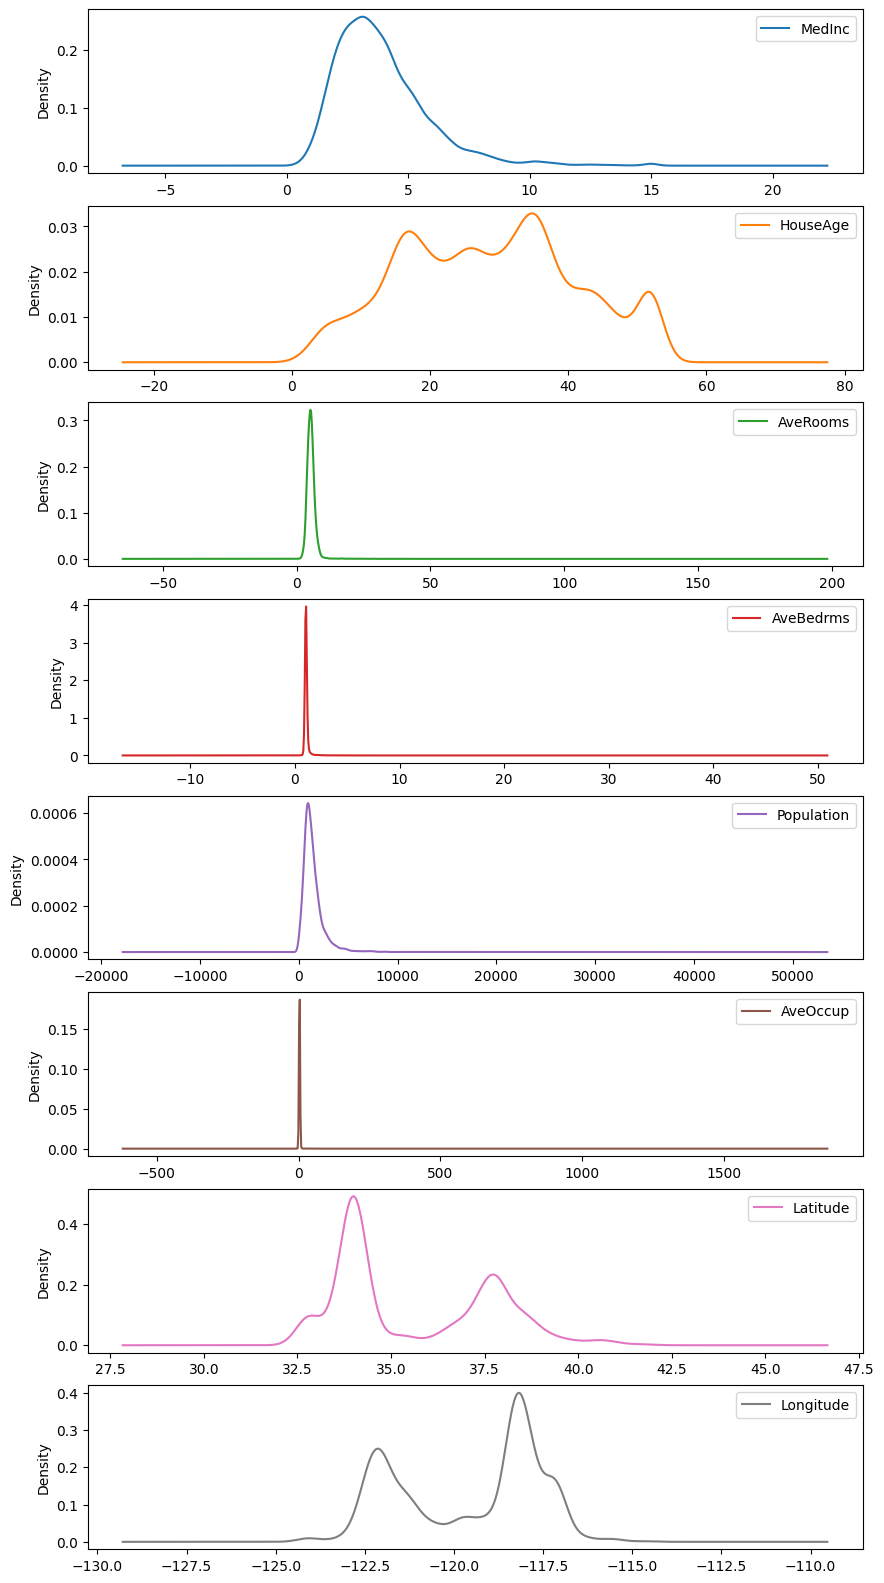

In [9]:
X_train.plot.kde(subplots=True, figsize=(10,20), sharex=False)

<Axes: xlabel='AveRooms', ylabel='Count'>

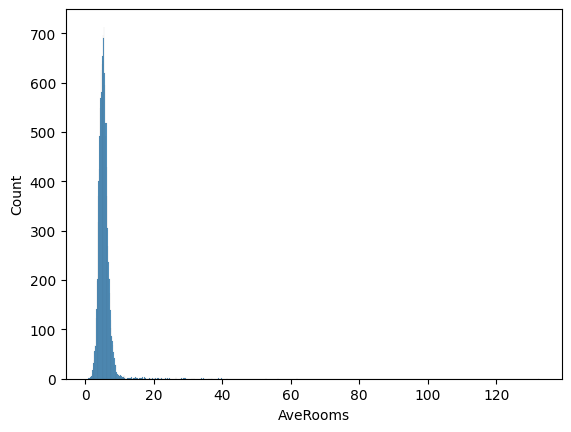

In [10]:
sns.histplot(data=X_train, x='AveRooms')

In [11]:
X_train['AveRooms'].quantile([0.1,0.5,0.90,0.95,0.99])

0.10     3.789708
0.50     5.238080
0.90     6.969890
0.95     7.656802
0.99    10.377530
Name: AveRooms, dtype: float64

In [12]:
X_train_99 = X_train[X_train['AveRooms']<X_train['AveRooms'].quantile(0.99)].copy()

In [13]:
X_train_99.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000,15325.000000
mean,3.875645,28.728352,5.284400,1.066905,1432.033279,3.122843,35.612976,-119.566380
std,1.896782,12.588834,1.242335,0.131166,1140.561433,12.042759,2.134051,2.000259
min,0.499900,1.000000,0.846154,0.375000,3.000000,0.750000,32.540000,-124.350000
25%,2.567000,18.000000,4.427136,1.005714,795.000000,2.432727,33.930000,-121.790000
50%,3.542600,29.000000,5.223169,1.048309,1171.000000,2.821530,34.240000,-118.480000
75%,4.760400,37.000000,6.032680,1.097436,1730.000000,3.286054,37.700000,-118.010000
max,15.000100,52.000000,10.375479,3.187970,35682.000000,1243.333333,41.950000,-114.560000


<Axes: xlabel='AveRooms', ylabel='Count'>

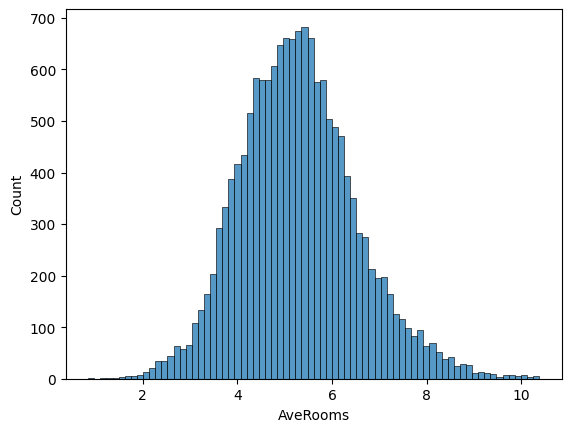

In [14]:
sns.histplot(data=X_train_99, x='AveRooms')

## Feature Scaling
---

**Algunos modelos comúnmente utilizados**
  
|Nombre del algoritmo | Necesita escalamiento? |
|--|--|
| SVM, KNN, PCA, K-Means, Linear Regression, Logistic Regression, Linear Discriminant Analysis| $\checkmark$ |
| Naive Bayes, Tree-Based models | $\times$ |

* Asimetría afecta modelos PCA, entonces es recomendable utilizar Power Transformations para remover asimetría.

### Min-Max scaling

Supongamos que queremos re-escalar el atributo en el rango $(a,b)$  

Fórmula: ${x}' = a + \frac{x - \mathrm{min}(x)\times (b - a) }{\mathrm{max}(x) -\mathrm{min}(x)}$  

Éste método es muy sensitivo a los valores atípicos porque éstos afectan tanto min$(x)$ como max$(x)$

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
mm_scaler = MinMaxScaler()

In [17]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_mm'
X_train[trans_col_name]= mm_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= mm_scaler.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='AveRooms_mm', ylabel='Count'>

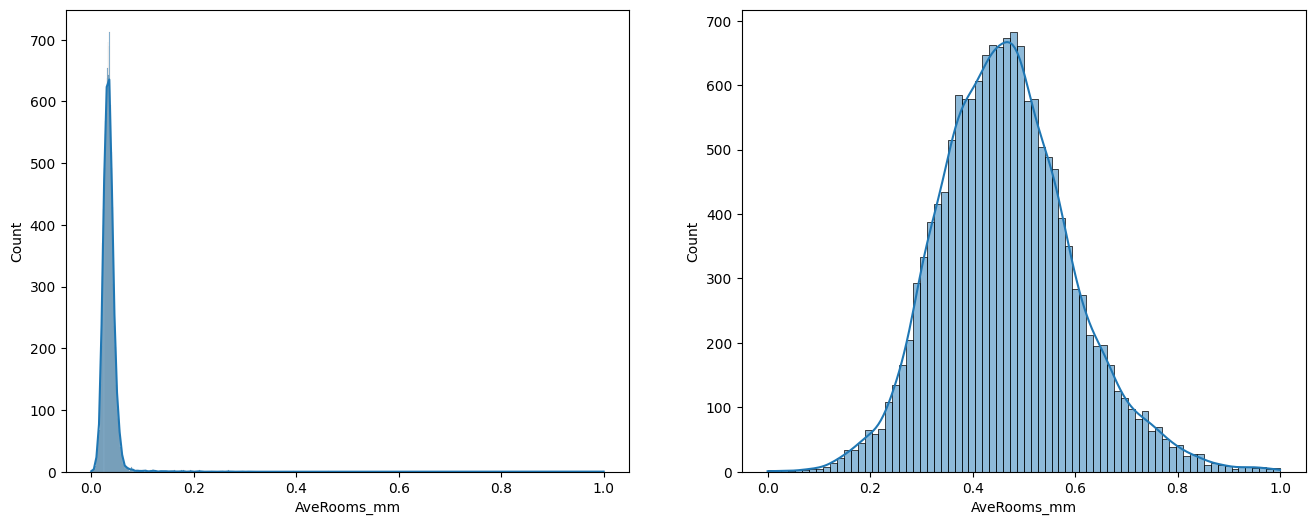

In [18]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

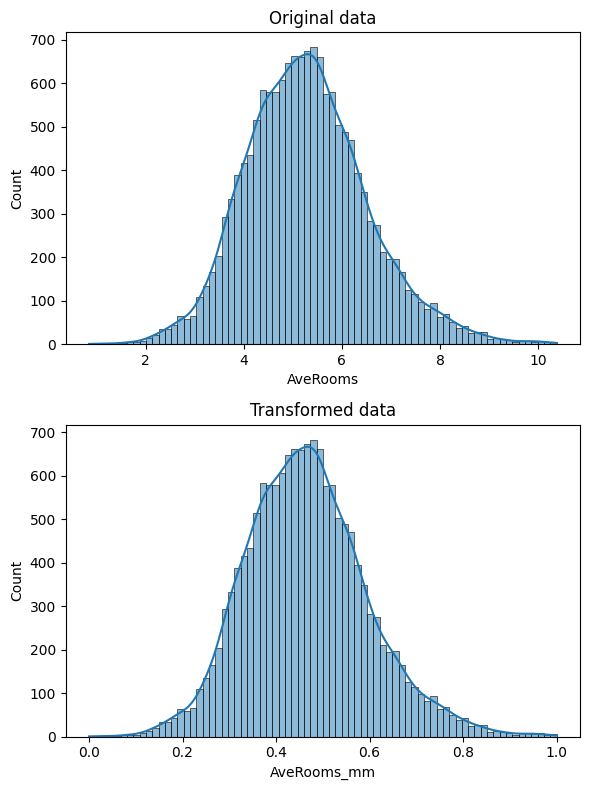

In [19]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

### Standardization or Normalization

Fórmula: ${z} = \frac{x - \mu }{\sigma}$ 

Donde $\mu$ es la media de $X$ y $\sigma$ es la desviación estándard.

Éste método también es sensitivo a valores atípicos porque afectan tanto $\mu$ como $\sigma$

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sd_scaler = StandardScaler( )
sd_scaler2 = StandardScaler(with_mean=False, with_std=True)

In [22]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_sd'
X_train[trans_col_name]= sd_scaler.fit_transform(X_train[['AveRooms']])
X_train_99[trans_col_name]= sd_scaler.fit_transform(X_train_99[['AveRooms']])
X_train_99[f'{trans_col_name}_2']= sd_scaler2.fit_transform(X_train_99[['AveRooms']])

<Axes: xlabel='AveRooms_sd_2', ylabel='Count'>

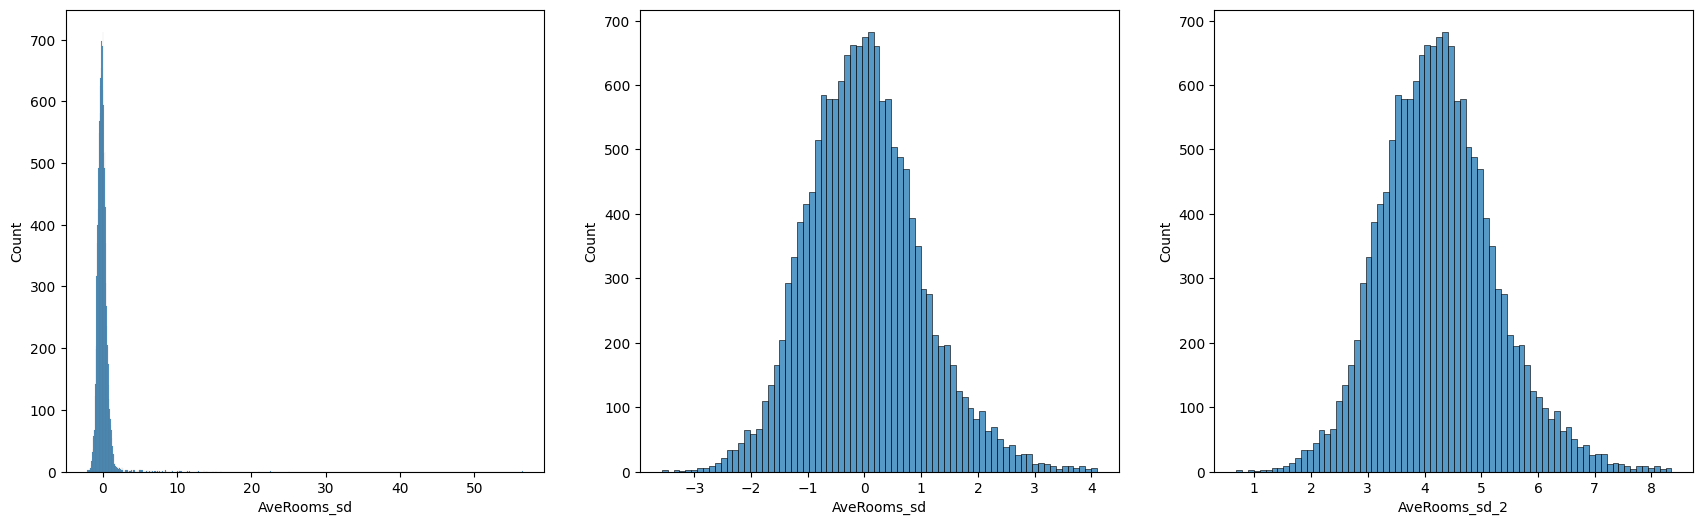

In [23]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0])
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1])
sns.histplot(data=X_train_99, x=f'{trans_col_name}_2', ax=axes[2])
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

### $l^2$ Normalization

Éste método trabaja sobre las filas del vector de atributos, no sobre columnas separadas. 

Supongamos que X[i][j] representa el valor del atributo $j$ en la instancia $i$.  
Fórmula para la norma $l^1$: $X[i][j] = \frac{X[i][j]}{\sum_{j=1|X[i][j]|}}$  
Fórmula para la norma $l^2$: $X[i][j] = \frac{X[i][j]}{\sqrt{\sum_{j=1}X[i][j]^2}}$  


In [24]:
from sklearn.preprocessing import Normalizer

In [25]:
l1_scaler = Normalizer(norm='l1')
l2_scaler = Normalizer()

In [26]:
X_train_norm = X_train_99[['AveRooms','MedInc']]

In [27]:
X_train_norm1= l1_scaler.fit_transform(X_train_norm)
X_train_norm2= l2_scaler.fit_transform(X_train_norm)

<Axes: >

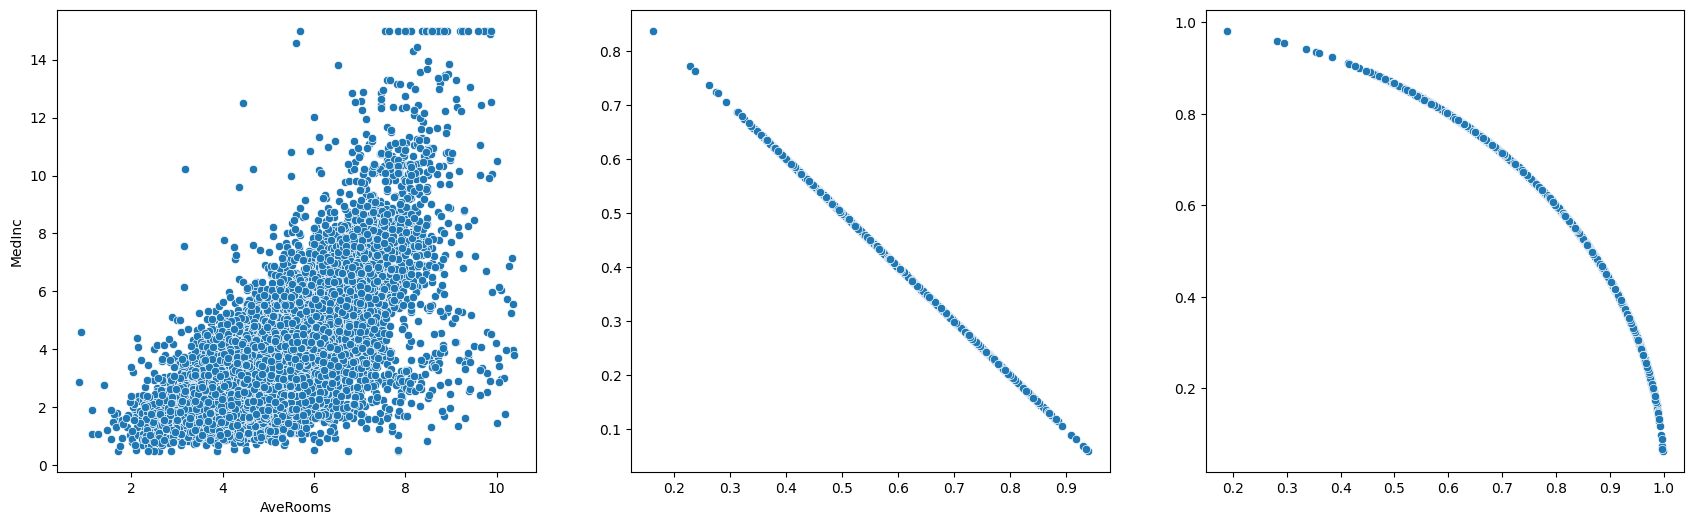

In [28]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.scatterplot(data=X_train_norm, x='AveRooms',y='MedInc', ax=axes[0])
sns.scatterplot(x=X_train_norm1[:,0],y=X_train_norm1[:,1], ax=axes[1])
sns.scatterplot(x=X_train_norm2[:,0],y=X_train_norm2[:,1], ax=axes[2])

### Robust Scaling

Supongamos que queremos escalar el atributo en el rango de cuantiles $(a, b)$

Fórmula: ${x}' = \frac{x - \mathrm{median}(x)}{\mathrm{quantile}(x,b) - \mathrm{quantile}(x,a)}$  

Este método es más robusto a valores atípicos.

In [29]:
from sklearn.preprocessing import RobustScaler

In [30]:
rb_scaler = RobustScaler ( )

In [31]:
col_name = 'AveRooms'
trans_col_name = 'AveRooms_rb'
X_train[trans_col_name]= rb_scaler.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= rb_scaler.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='AveRooms_rb', ylabel='Count'>

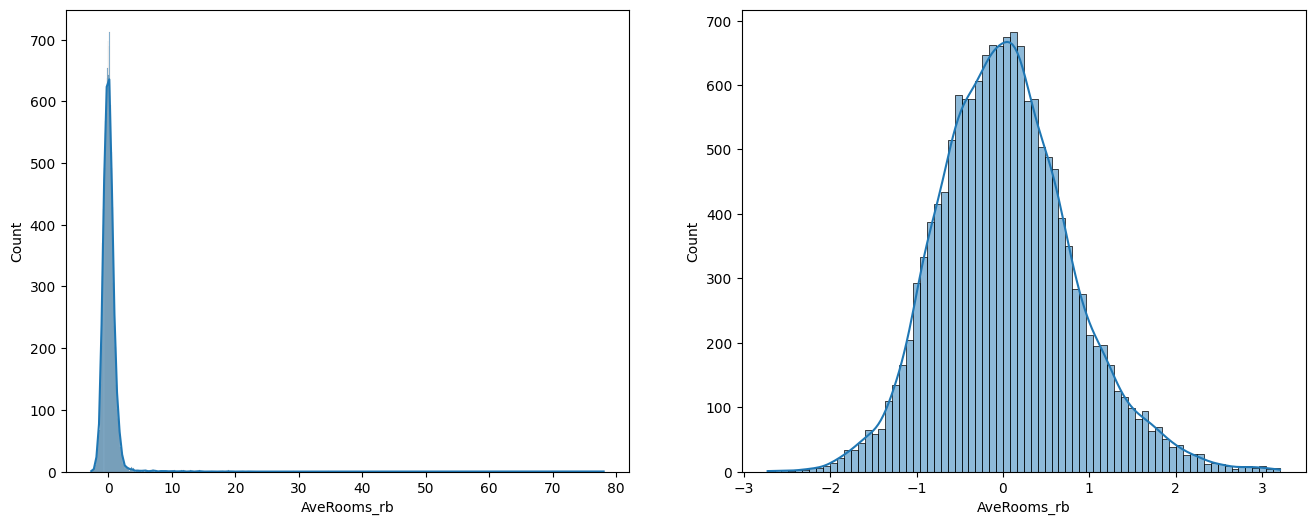

In [32]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

## Feature Transformation
---

### Transformación Box-Cox

La transformación Box-Cox funciona únicamente para números estrictamente positivos. La transformación esta definida de la siguiente manera:

$x_i'(\lambda) = \left\{\begin{matrix}
 \frac{x_i^\lambda - 1}{\lambda}& if \lambda \neq 0\\ 
 log(\lambda)& if \lambda =  0
\end{matrix}\right.$  

### Transformación Yeo-Johnson

La transformación Yeo-Johnson trabaja tanto para valores positivos como negativos. La transformación esta definida de la siguiente manera:

$x_i(\lambda) = \left\{\begin{matrix}
\frac{[(x_i + 1)^{\lambda} -1]}{\lambda} & if \, \, \lambda\neq 0, x_i \geq  0 \\ 
ln(x_i + 1) & if \, \, \lambda =  0, x_i \geq  0\\ 
-\frac{[(-x_i + 1)^{2- \lambda} -1]}{2-\lambda} & if \, \, \lambda\neq 2, x_i <  0 \\ 
-ln(-x_i + 1) & if \, \, \lambda =  2, x_i <  0\\ 
\end{matrix}\right.$  


Usualmente los valores de $\lambda$  entre $[-5,5]$ son considerados y el valor óptimo que estabiliza la varianza y minimiza la asimetría es seleccionado utilizando MLE (Maximum Likelihood Estimate)

<Axes: xlabel='MedInc', ylabel='Density'>

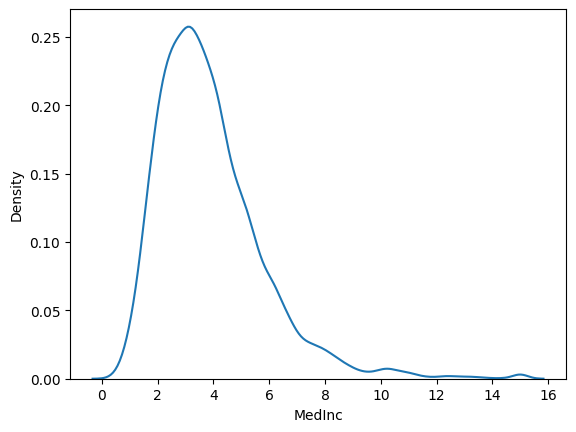

In [33]:
sns.kdeplot(data=X_train_99, x='MedInc')

In [34]:
from sklearn.preprocessing import PowerTransformer

In [35]:
bx_transformer = PowerTransformer(method='box-cox')

In [36]:
col_name = 'MedInc'
trans_col_name = 'MedInc_bx'
X_train[trans_col_name]= bx_transformer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= bx_transformer.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='MedInc_bx', ylabel='Count'>

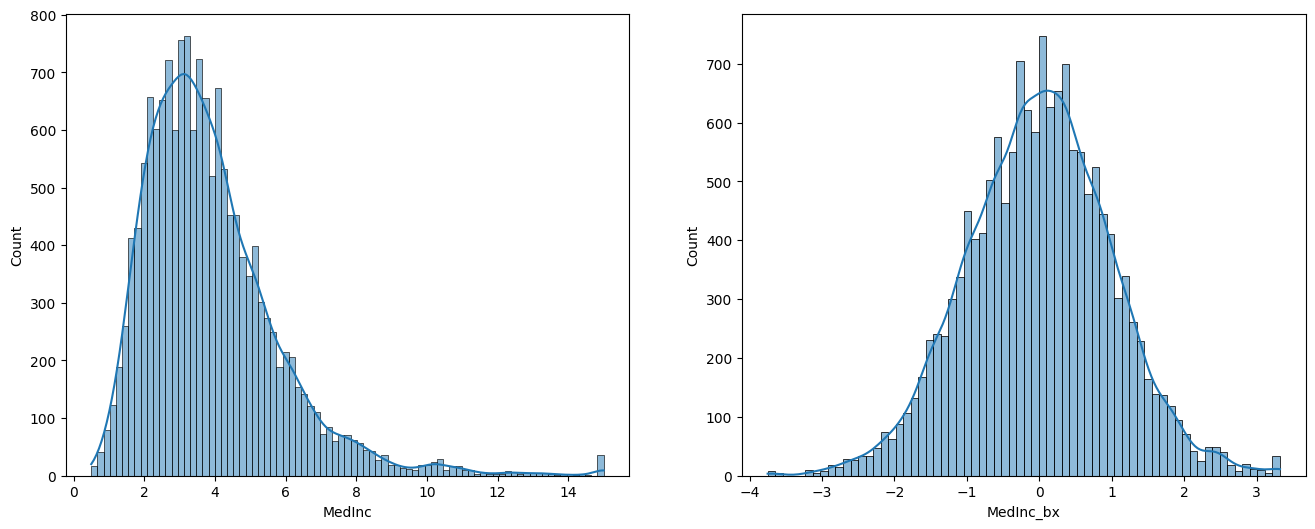

In [37]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

In [38]:
bx_transformer.lambdas_

array([0.10272526])

In [42]:
from scipy.stats import probplot

((array([-3.91728489, -3.69792144, -3.57774746, ...,  3.57774746,
          3.69792144,  3.91728489]),
  array([-3.74288994, -3.74288994, -3.74288994, ...,  3.31511245,
          3.31511245,  3.31511245])),
 (0.9994991371076963, -1.7614095456920707e-16, 0.9992582808169217))

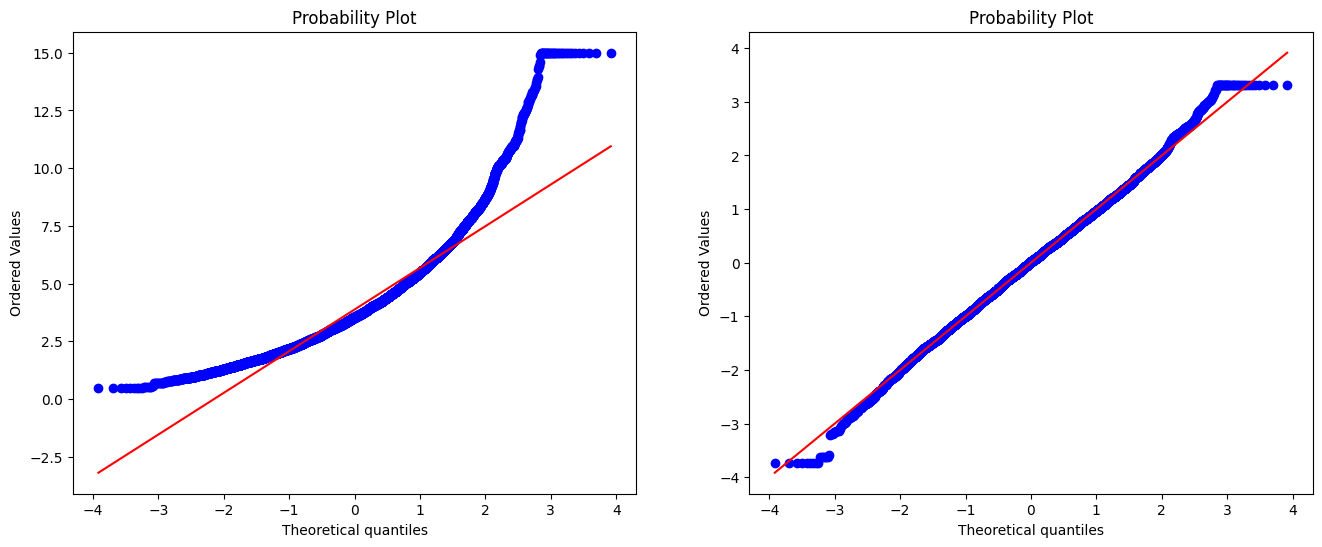

In [43]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
probplot(X_train[col_name], plot=axes[0])
probplot(X_train[trans_col_name], plot=axes[1])


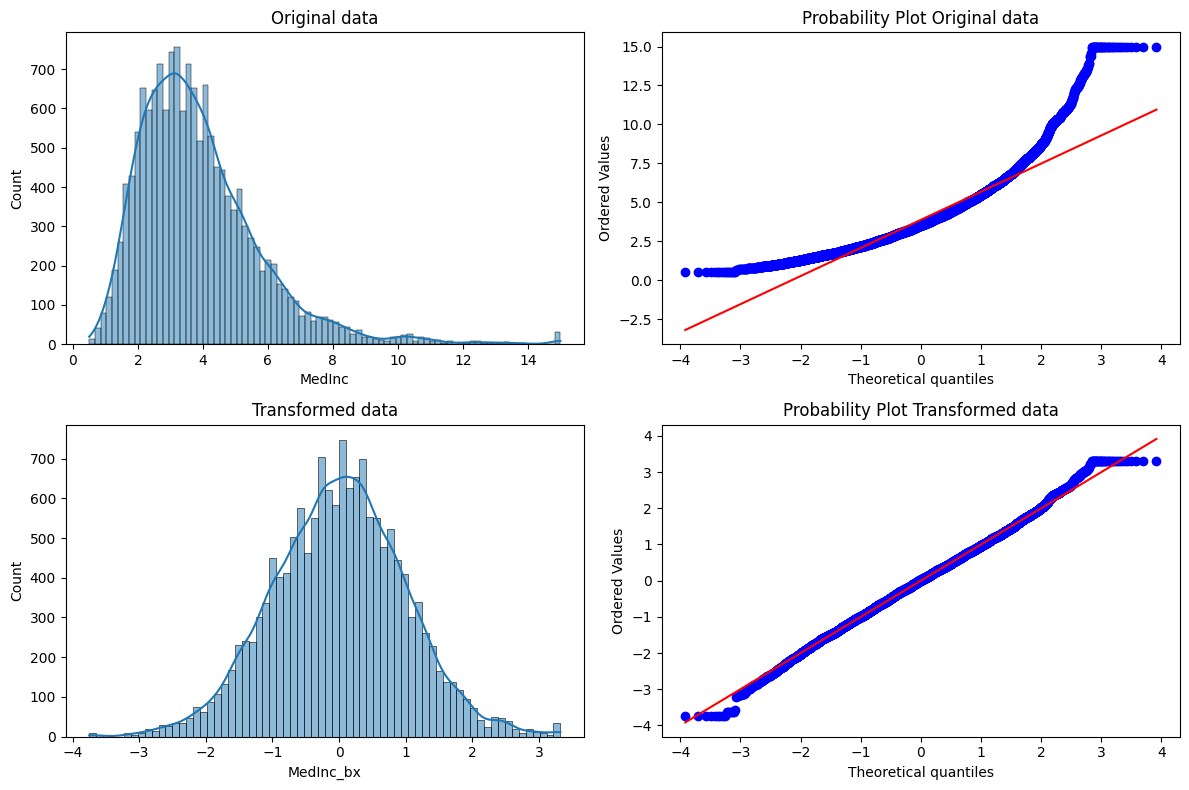

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0,0],kde=True)
probplot(X_train[col_name], plot=axes[0,1])
axes[0,0].set_title('Original data')
axes[0,1].set_title(axes[0,1].get_title()+' Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1,0], kde=True)
probplot(X_train[trans_col_name], plot=axes[1,1])
axes[1,0].set_title('Transformed data')
axes[1,1].set_title(axes[1,1].get_title()+' Transformed data')
plt.tight_layout()

In [45]:
col_name = 'HouseAge'
trans_col_name = 'HouseAge_bx'
X_train[trans_col_name]= bx_transformer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= bx_transformer.fit_transform(X_train_99[[col_name]])

<Axes: xlabel='HouseAge_bx', ylabel='Count'>

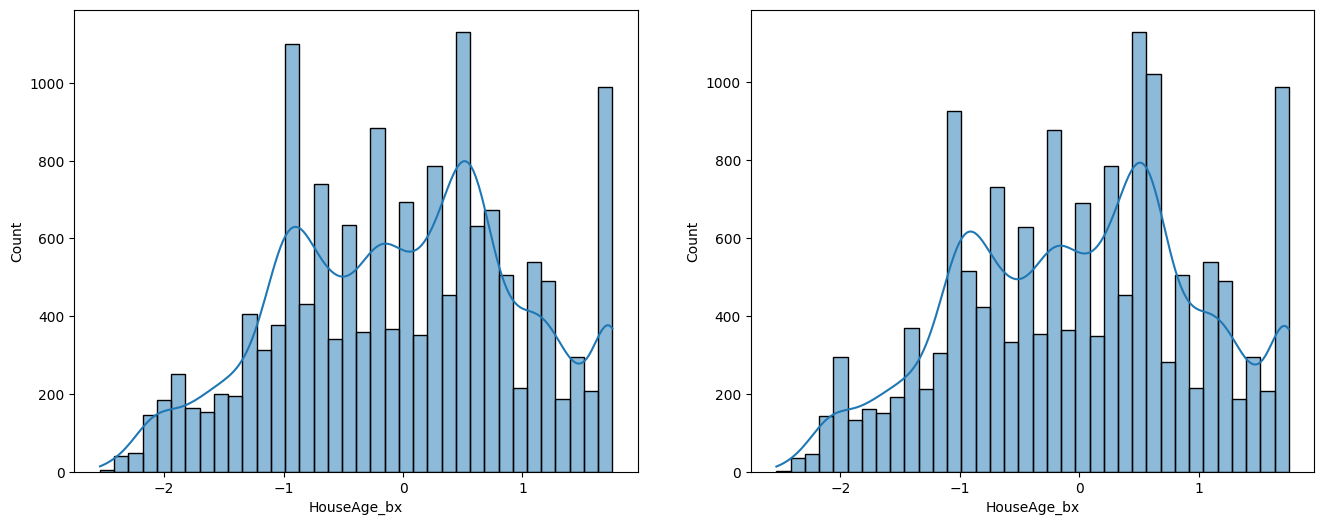

In [46]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

((array([-3.91728489, -3.69792144, -3.57774746, ...,  3.57774746,
          3.69792144,  3.91728489]),
  array([-2.53756342, -2.53756342, -2.53756342, ...,  1.75322669,
          1.75322669,  1.75322669])),
 (0.990467460694586, -1.1526551857719582e-16, 0.9902287808299838))

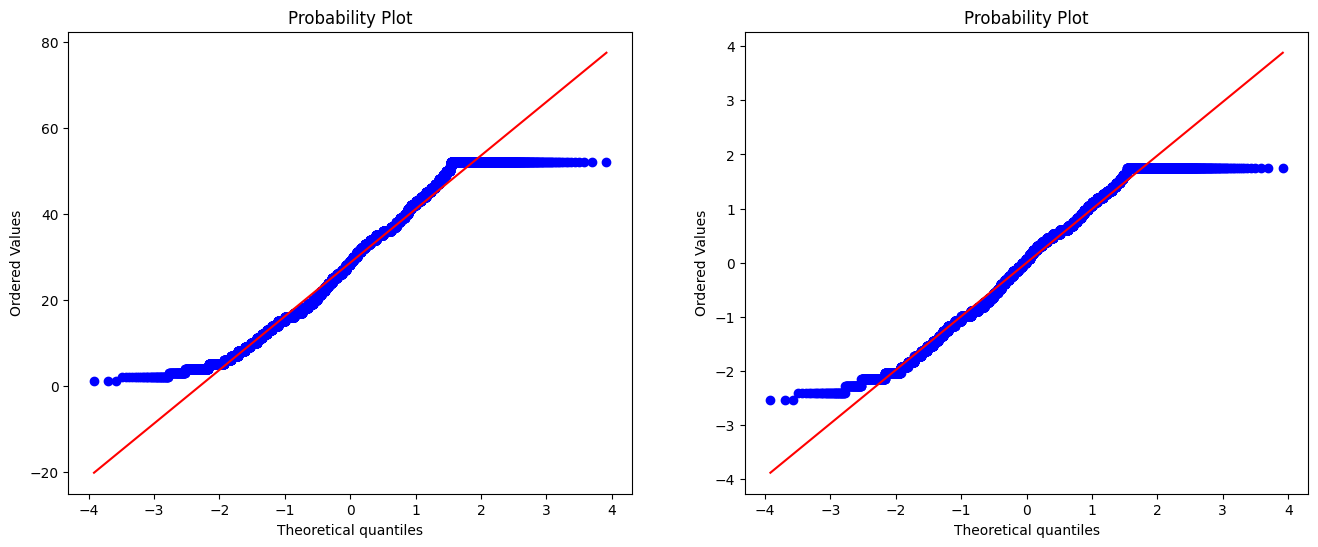

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
probplot(X_train[col_name], plot=axes[0])
probplot(X_train[trans_col_name], plot=axes[1])


Lest try with another attribute

### Quantile transformation

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
q_transformer = QuantileTransformer( output_distribution='normal')

In [ ]:
col_name = 'MedInc'
trans_col_name = 'MedInc_q'
X_train[trans_col_name]= q_transformer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= q_transformer.fit_transform(X_train_99[[col_name]])

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train, x=col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (99 percentile)')

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0,0],kde=True)
probplot(X_train_99[col_name], plot=axes[0,1])
axes[0,0].set_title('Original data')
axes[0,1].set_title(axes[0,1].get_title()+' Original data')
sns.histplot(data=X_train_99, x=trans_col_name, ax=axes[1,0], kde=True)
probplot(X_train[trans_col_name], plot=axes[1,1]  )
axes[1,0].set_title('Transformed data')
axes[1,1].set_title(axes[1,1].get_title()+' Transformed data')
plt.tight_layout()

## Feature Discretization
---

### Binarization

Convertir variables numéricas en respuestas binarias

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
col_name = 'MedInc'
trans_col_name = 'MedInc_bin'

In [ ]:
binarizer = Binarizer(threshold=6)

In [ ]:
X_train[trans_col_name]= binarizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= binarizer.fit_transform(X_train_99[[col_name]])

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title('Count plot with the binarized data (threshold of 6)')

### Uniform binning

Mapear variables numéricas en bloques uniformes

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
n_bins = 5

In [ ]:
col_name = 'Population'
trans_col_name = 'Population_ubin'

In [ ]:
ubin_discretizer = KBinsDiscretizer(  n_bins=n_bins, encode='ordinal', strategy='uniform')

In [ ]:
X_train[trans_col_name]= ubin_discretizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= ubin_discretizer.fit_transform(X_train_99[[col_name]])

In [ ]:
ubin_discretizer.bin_edges_[0]

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in ubin_discretizer.bin_edges_[0]: # uniform bins
    line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['Uniform in edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'Uniform binning result ({n_bins} bins)')
plt.tight_layout()

In [ ]:
col_name = 'Population'
trans_col_name = 'Population_kbin'

In [ ]:
kbin_discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='kmeans')

In [ ]:
X_train[trans_col_name]= kbin_discretizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= kbin_discretizer.fit_transform(X_train_99[[col_name]])

In [ ]:
kbin_discretizer.bin_edges_[0]

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in kbin_discretizer.bin_edges_[0]: # kmeans bins
    line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['k-means bin Edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'k-means binning result ({n_bins} bins)')
plt.tight_layout()

### Quantile binning

Maper variables numéricas en bloques con frecuencias uniformes


In [ ]:
col_name = 'Population'
trans_col_name = 'Population_qbin'

In [ ]:
qbin_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

In [ ]:
X_train[trans_col_name]= qbin_discretizer.fit_transform(X_train[[col_name]])
X_train_99[trans_col_name]= qbin_discretizer.fit_transform(X_train_99[[col_name]])

In [ ]:
qbin_discretizer.bin_edges_[0]

In [ ]:
fig, axes = plt.subplots(nrows=2, figsize=(12,8))
sns.histplot(data=X_train_99, x=col_name, ax=axes[0], kde=True)
axes[0].set_title('Histogram with whole training data')
for edge in qbin_discretizer.bin_edges_[0]: # quantile bins
  line = axes[0].axvline(edge, color='b')
axes[0].legend([line], ['Quantile bin Edges'], fontsize=10)
sns.countplot(x=X_train_99[trans_col_name])
axes[1].set_title(f'Quantile binning result ({n_bins} bins)')
plt.tight_layout()